<a href="https://colab.research.google.com/github/Zafar-Lab/scDREAMER/blob/main/2109_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#%tensorflow_version 1.x

In [2]:
import warnings
warnings.filterwarnings('ignore')
"""
!pip install -U scipy==1.5.0
!pip install scanpy==1.8.2
!pip install -U scikit-learn
"""

'\n!pip install -U scipy==1.5.0\n!pip install scanpy==1.8.2\n!pip install -U scikit-learn\n'

In [3]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0" # difference between gpu '0' and '1'
#os.environ["PYTHONHASHSEED"] = "0"

import numpy as np
import tensorflow as tf2
import random
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

import scipy.io
from sklearn.decomposition import PCA
import pdb

import pandas as pd
import scanpy as sc


import scipy.sparse
from sklearn.metrics.cluster import normalized_mutual_info_score as nmi
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from scipy import stats 
from scipy import * 
import datetime 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

os.getpid()


2023-05-20 15:39:27.865180: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-20 15:39:29.644099: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Instructions for updating:
non-resource variables are not supported in the long term


1470025

In [4]:
#tf.enable_eager_execution()
np.random.seed(0)
#tf.set_random_seed(0)
tf.set_random_seed(0)
random.seed(0)
tf2.random.set_seed(0)
tf2.keras.utils.set_random_seed(0)
#tf.keras.utils.set_random_seed(0)

Building model

In [5]:

"""
Lung_pseudo_cell_types_apr17_0per: 17
Lung_pseudo_cell_types_clus16_50_0per

Lung_leiden_50_10
Lung_leiden_17_80_20

"""

data_path = "/home/ajita/Documents/data_integration/Lung/Lung_louvain_ 17_0.8_0.0.h5ad" 

In [6]:
name = "Lung"

batch_key_dic = {'Immune_Human' : 'batch',
                 'Lung' : 'batch',
                 'Pancreas' : 'tech',
                 'Human_Mouse' : 'batch',
                 'Human_Retina': "Batch"
                 
                }
# provide the cell type that is inferred using community algorithms
cell_type_key_dic = {'Immune_Human' : 'cell_type_inferred', #'final_annotation',
                 'Lung' : 'cell_type_inferred',
                 'Pancreas' : 'cell_type_inferred',
                 'Human_Mouse' : "cell_type_inferred",
                 "Human_Retina":"cell_type_inferred"
                    }    

# provide the selected (confident) cell types for learning the model
cell_type_key_dic_NA = {'Immune_Human' : 'celltype_NA', #'final_annotation',
                 'Lung' : 'celltype_NA',
                 'Pancreas' : 'celltype_NA',
                 'Human_Mouse' : "celltype_NA",
                 "Human_Retina":"celltype_NA"
                    } 

# provide the ground truth for plotting purpose
plot_cell_type_key_dic = {'Immune_Human' : 'final_annotation', #'final_annotation',
                 'Lung' : 'cell_type',
                 'Pancreas' : 'celltype',
                 'Human_Mouse' : "celltype",
                 "Human_Retina":"Subcluster"
                    }   






2023-05-20 15:39:37.520834: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5367 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:af:00.0, compute capability: 7.5


came in load_gene
updated hvg
here [9 9 9 ... 0 0 0]
Shape self.data_train: (32472, 2000)
Shape self.data_test: (32472, 2000)
encoder input shape  Tensor("concat:0", shape=(?, 2016), dtype=float32)
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use `tf.cast` instead.
decoder input shape  Tensor("concat_2:0", shape=(?, 26), dtype=float32)
inferred check Tensor("Max:0", shape=(), dtype=float32)
entering in for loop 1   512  -- > 256
KL gaussian z Tensor("mul_13:0", shape=(?,), dtype=float32)
KL gaussian l Tensor("mul_12:0", shape=(?,), dtype=float32)
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Cluster DRA on DataSet /home/ajita/Documents/data_integration/Lung/Lung_louvain_ 17_0.8_0.0.h5ad ... 


2023-05-20 15:39:50.329277: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:353] MLIR V1 optimization pass is not enabled


Epoch : [0] ,  a_loss = 575.5216, d_loss: -0.0027 , db_loss: 2.6928
latent_matrix shape (32472, 10)
(32472,)


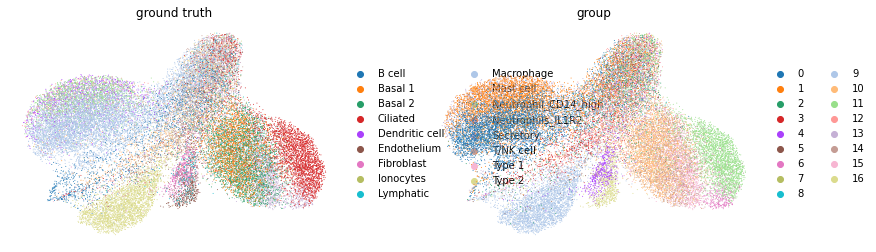

None


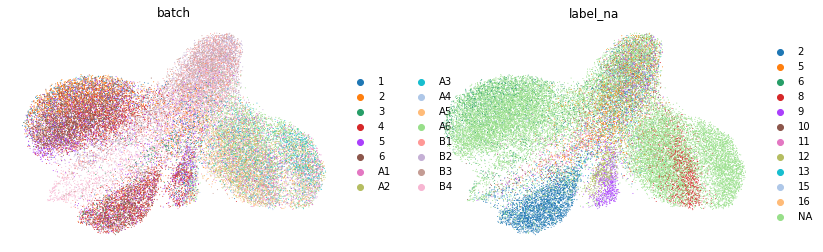

None
Computing NMI ...
Done !
NMI = 0.41684027201176477
Epoch : [1] ,  a_loss = 339.8057, d_loss: -0.0315 , db_loss: 1.9000
Epoch : [2] ,  a_loss = 324.6094, d_loss: -0.0413 , db_loss: 2.0982
Epoch : [3] ,  a_loss = 515.6838, d_loss: -0.0131 , db_loss: 2.9111
Epoch : [4] ,  a_loss = 406.6442, d_loss: -0.0067 , db_loss: 1.5488
Epoch : [5] ,  a_loss = 461.4402, d_loss: -0.0046 , db_loss: 2.0916
Epoch : [6] ,  a_loss = 476.3140, d_loss: -0.0058 , db_loss: 1.8120
Epoch : [7] ,  a_loss = 284.5503, d_loss: -0.0157 , db_loss: 0.2334
Epoch : [8] ,  a_loss = 436.5911, d_loss: -0.0063 , db_loss: 1.5814
Epoch : [9] ,  a_loss = 426.3951, d_loss: -0.0066 , db_loss: 1.1972
Epoch : [10] ,  a_loss = 489.2366, d_loss: -0.0022 , db_loss: 2.3913
Epoch : [11] ,  a_loss = 416.1436, d_loss: -0.0080 , db_loss: 2.2459
Epoch : [12] ,  a_loss = 226.1015, d_loss: -0.1089 , db_loss: 1.7302
Epoch : [13] ,  a_loss = 386.5939, d_loss: -0.0163 , db_loss: 1.7328
Epoch : [14] ,  a_loss = 462.2445, d_loss: -0.0101 , db_

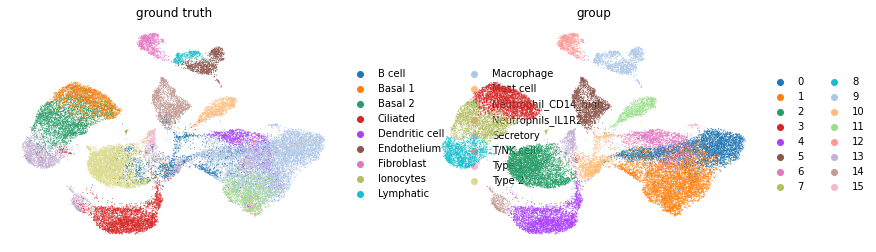

None


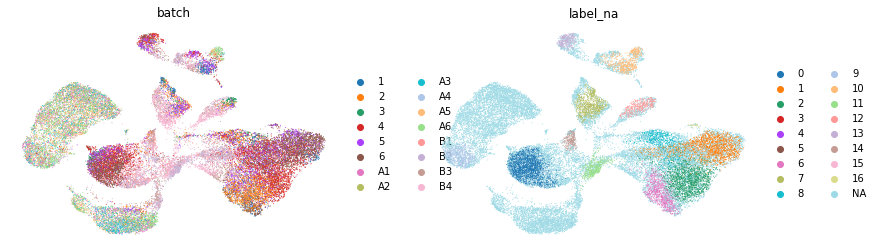

None
Computing NMI ...
Done !
NMI = 0.7048868296102211
Epoch : [51] ,  a_loss = 232.6808, d_loss: -0.0087 , db_loss: 0.7130
Epoch : [52] ,  a_loss = 363.9116, d_loss: -0.0021 , db_loss: 2.2945
Epoch : [53] ,  a_loss = 174.8229, d_loss: -0.0394 , db_loss: 1.7184
Epoch : [54] ,  a_loss = 374.2791, d_loss: -0.3023 , db_loss: 1.5063
Epoch : [55] ,  a_loss = 159.5275, d_loss: -0.2682 , db_loss: 1.9012
Epoch : [56] ,  a_loss = 420.1521, d_loss: -0.3799 , db_loss: 0.9418
Epoch : [57] ,  a_loss = 430.1770, d_loss: -0.3797 , db_loss: 1.7108
Epoch : [58] ,  a_loss = 430.5374, d_loss: -0.4343 , db_loss: 1.8865
Epoch : [59] ,  a_loss = 166.5372, d_loss: -0.4981 , db_loss: 0.9882
Epoch : [60] ,  a_loss = 289.1568, d_loss: -0.4872 , db_loss: 1.4533
Epoch : [61] ,  a_loss = 158.4592, d_loss: -0.4472 , db_loss: 1.7057
Epoch : [62] ,  a_loss = 201.5381, d_loss: -0.4497 , db_loss: 2.4520
Epoch : [63] ,  a_loss = 397.6780, d_loss: -0.6037 , db_loss: 1.4146
Epoch : [64] ,  a_loss = 166.9664, d_loss: -0.46

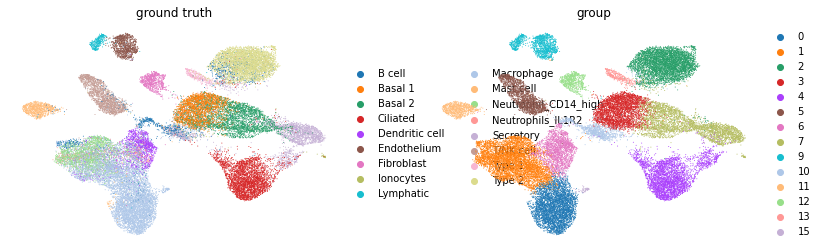

None


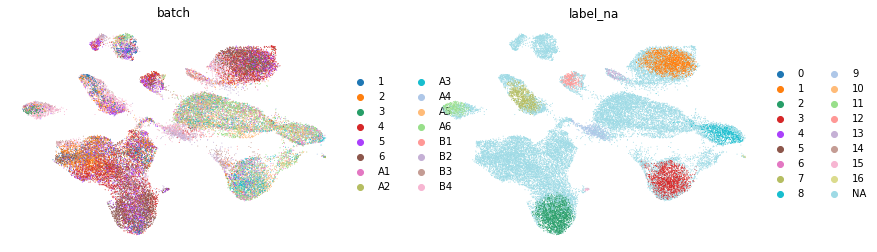

None
Computing NMI ...
Done !
NMI = 0.6947010000705096
Epoch : [101] ,  a_loss = 366.7884, d_loss: -0.1519 , db_loss: 1.8386
Epoch : [102] ,  a_loss = 343.6856, d_loss: -0.1194 , db_loss: 2.6717
Epoch : [103] ,  a_loss = 345.7327, d_loss: -0.0911 , db_loss: 1.4676
Epoch : [104] ,  a_loss = 359.5485, d_loss: -0.0553 , db_loss: 1.8052
Epoch : [105] ,  a_loss = 436.8427, d_loss: -0.1022 , db_loss: 2.1812
Epoch : [106] ,  a_loss = 352.8006, d_loss: -0.0893 , db_loss: 1.6809
Epoch : [107] ,  a_loss = 423.6094, d_loss: -0.0854 , db_loss: 1.8554
Epoch : [108] ,  a_loss = 420.4457, d_loss: -0.0576 , db_loss: 1.6882
Epoch : [109] ,  a_loss = 401.8617, d_loss: -0.1156 , db_loss: 2.7150
Epoch : [110] ,  a_loss = 418.3304, d_loss: -0.0845 , db_loss: 1.3074
Epoch : [111] ,  a_loss = 180.3851, d_loss: -0.1298 , db_loss: 2.6841
Epoch : [112] ,  a_loss = 413.0195, d_loss: -0.0699 , db_loss: 1.9191
Epoch : [113] ,  a_loss = 396.6623, d_loss: -0.1010 , db_loss: 2.3206
Epoch : [114] ,  a_loss = 163.2414,

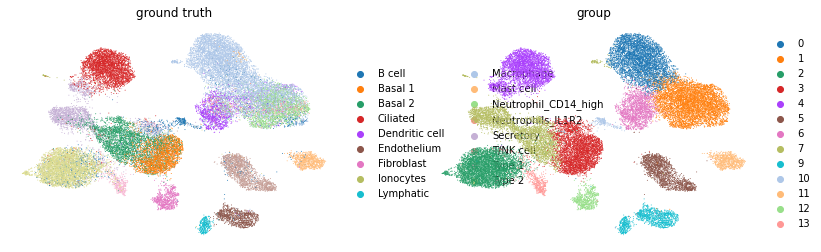

None


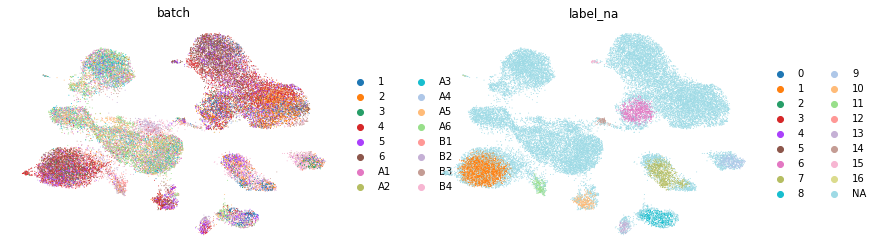

None
Computing NMI ...
Done !
NMI = 0.6684862764308293
Epoch : [151] ,  a_loss = 210.0214, d_loss: -0.1887 , db_loss: 1.7570
Epoch : [152] ,  a_loss = 159.9747, d_loss: -0.4219 , db_loss: 2.5236
Epoch : [153] ,  a_loss = 351.5520, d_loss: 0.6501 , db_loss: 1.5664
Epoch : [154] ,  a_loss = 306.0891, d_loss: -0.0281 , db_loss: 2.1056
Epoch : [155] ,  a_loss = 165.0301, d_loss: -0.0165 , db_loss: 2.1552
Epoch : [156] ,  a_loss = 423.8327, d_loss: -0.0636 , db_loss: 2.2298
Epoch : [157] ,  a_loss = 379.7081, d_loss: -0.0155 , db_loss: 1.9998
Epoch : [158] ,  a_loss = 399.4516, d_loss: -0.0082 , db_loss: 1.7783
Epoch : [159] ,  a_loss = 382.3979, d_loss: -0.0025 , db_loss: 1.1658
Epoch : [160] ,  a_loss = 347.1610, d_loss: -0.0004 , db_loss: 1.7207
Epoch : [161] ,  a_loss = 441.2390, d_loss: -0.0042 , db_loss: 1.1734
Epoch : [162] ,  a_loss = 324.6895, d_loss: -0.0023 , db_loss: 1.1241
Epoch : [163] ,  a_loss = 379.4610, d_loss: -0.0051 , db_loss: 1.9474
Epoch : [164] ,  a_loss = 373.4375, 

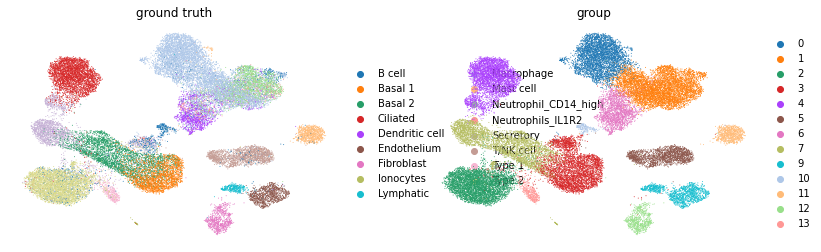

None


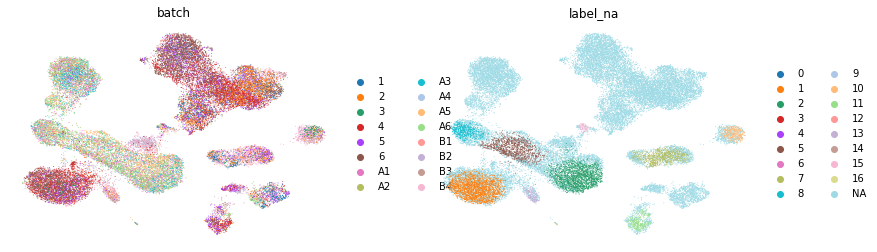

None
Computing NMI ...
Done !
NMI = 0.6768374566937375
Epoch : [201] ,  a_loss = 387.3120, d_loss: -0.0054 , db_loss: 1.7779
Epoch : [202] ,  a_loss = 347.6215, d_loss: -0.0025 , db_loss: 2.1322
Epoch : [203] ,  a_loss = 383.4684, d_loss: -0.0038 , db_loss: 1.8354
Epoch : [204] ,  a_loss = 360.2827, d_loss: -0.0026 , db_loss: 2.2022
Epoch : [205] ,  a_loss = 271.8346, d_loss: -0.0165 , db_loss: 1.9496
Epoch : [206] ,  a_loss = 265.7907, d_loss: -0.0181 , db_loss: 2.2964
Epoch : [207] ,  a_loss = 226.2871, d_loss: -0.0377 , db_loss: 2.6043
Epoch : [208] ,  a_loss = 388.4854, d_loss: -0.0026 , db_loss: 2.0563
Epoch : [209] ,  a_loss = 417.7791, d_loss: -0.0235 , db_loss: 1.4544
Epoch : [210] ,  a_loss = 177.1823, d_loss: -0.0793 , db_loss: 1.9231
Epoch : [211] ,  a_loss = 390.3948, d_loss: -0.0146 , db_loss: 2.1863
Epoch : [212] ,  a_loss = 381.5645, d_loss: -0.0094 , db_loss: 2.2266
Epoch : [213] ,  a_loss = 397.2909, d_loss: -0.0118 , db_loss: 1.6651
Epoch : [214] ,  a_loss = 333.2603,

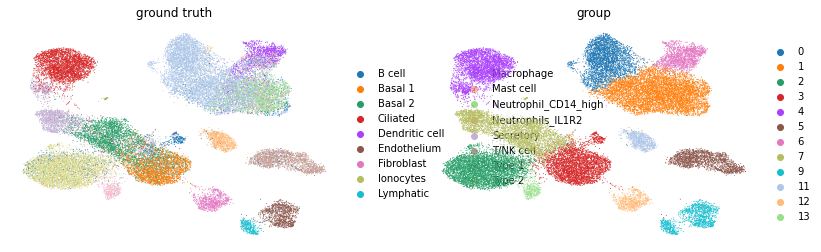

None


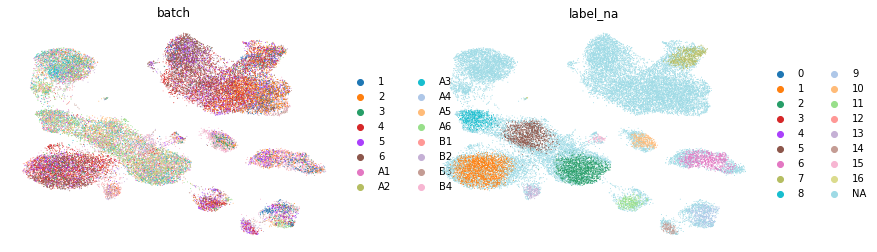

None
Computing NMI ...
Done !
NMI = 0.6638615762721842
Epoch : [251] ,  a_loss = 320.8666, d_loss: -0.0037 , db_loss: 1.1799
Epoch : [252] ,  a_loss = 359.3956, d_loss: -0.0054 , db_loss: 2.7791
Epoch : [253] ,  a_loss = 157.0695, d_loss: -0.1294 , db_loss: 1.4071
Epoch : [254] ,  a_loss = 383.0219, d_loss: -0.0064 , db_loss: 2.1741
Epoch : [255] ,  a_loss = 333.3260, d_loss: -0.0318 , db_loss: 2.7346
Epoch : [256] ,  a_loss = 367.3161, d_loss: -0.0056 , db_loss: 3.3857
Epoch : [257] ,  a_loss = 249.4206, d_loss: -0.0129 , db_loss: 2.8754
Epoch : [258] ,  a_loss = 385.1310, d_loss: -0.0030 , db_loss: 2.1235
Epoch : [259] ,  a_loss = 422.3441, d_loss: -0.0038 , db_loss: 1.8439
Epoch : [260] ,  a_loss = 405.0053, d_loss: -0.0022 , db_loss: 1.7622
Epoch : [261] ,  a_loss = 227.0241, d_loss: -0.0100 , db_loss: 1.3931
Epoch : [262] ,  a_loss = 420.5300, d_loss: -0.0016 , db_loss: 1.0316
Epoch : [263] ,  a_loss = 411.5594, d_loss: -0.0043 , db_loss: 3.0269
Epoch : [264] ,  a_loss = 404.5023,

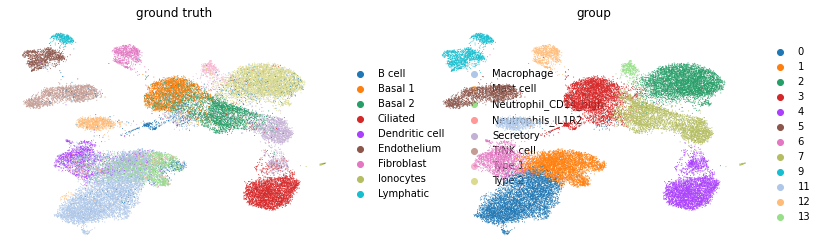

None


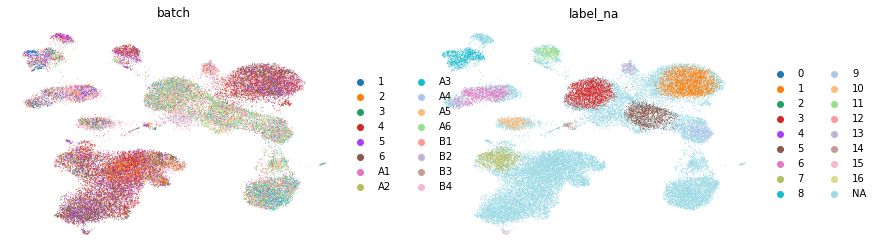

None
Computing NMI ...
Done !
NMI = 0.6348887447141917


In [7]:

import src.model_scanvi_semisupervised as model

run_config = tf.ConfigProto()

run_config.gpu_options.per_process_gpu_memory_fraction = 0.333
run_config.gpu_options.allow_growth = True

with tf.Session(config = run_config) as sess:

    dreamer = model.scDREAMER(
        sess,
        epoch = 300,
        dataset_name = data_path,
        batch = batch_key_dic[name],
        cell_type = cell_type_key_dic[name],
        cell_type_NA = cell_type_key_dic_NA[name],
        plot_cell_type = plot_cell_type_key_dic[name],
        name = name,
        dis_conn = 0.0, 
        conn = 0.5,
        community_algo = "louvain" # "louvain", leiden
        )

    dreamer.train_cluster()
    

In [8]:
NA    24408
1      2079
3      1518
7       921
8       835
9       674
10      606
11      427
12      362
13      299
14      205
15      120
16       18
6         0
5         0

NA    24408
2      2079
3      1518
5       921
8       835
9       674
10      606
11      427
12      362
13      299
14      205
15      120
16       18
6         0
7         0
4         0

SyntaxError: invalid syntax (1962698702.py, line 1)